In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

#import dataframe
df = pd.read_csv('/kaggle/input/planet-dataset/planets_updated.csv')
df

,Planet,Color,Mass (10^24kg),Diameter (km),Density (kg/m^3),Surface Gravity(m/s^2),Escape Velocity (km/s),Rotation Period (hours),Length of Day (hours),Distance from Sun (10^6 km),...,Mean Temperature (C),Surface Pressure (bars),Number of Moons,Ring System?,Global Magnetic Field?,Surface Temperature (C),Atmospheric Composition,Atmospheric Pressure (bars),Surface Features,Composition
0,Mercury,Grey,0.330,4879,5429,3.7,4.3,1407.6,4222.6,57.9,...,167,0,0,No,Yes,-173 to 427,Mostly None,Trace,"Craters, Scarps",Rock and Metal
1,Venus,Brown and Grey,4.870,12104,5243,8.9,10.4,-5832.5,2802.0,108.2,...,464,92,0,No,No,462,Carbon Dioxide (96.5%),92,"Volcanoes, Venusian Plains",Rock and Metal
2,Earth,"Blue, Brown Green and White",5.970,12756,5514,9.8,11.2,23.9,24.0,149.6,...,15,1,1,No,Yes,-89 to 58,"Nitrogen (78.1%), Oxygen",1,"Mountains, Oceans, Forests","Rock, Water, and Air"
3,Mars,"Red, Brown and Tan",0.642,6792,3934,3.7,5.0,24.6,24.7,228.0,...,-65,0.01,2,No,No,-153 to 20,Carbon Dioxide (95.3%),0.006,"Valles Marineris, Olympus Mons",Rock and Ice
4,Jupiter,"Brown, Orange and Tan, with White cloud stripes",1898.000,142984,1326,23.1,59.5,9.9,9.9,778.5,...,-110,Unknown,79,Yes,Yes,-108 to -150,"Hydrogen, Helium",Unknown,"Great Red Spot, Jupiter's Rings",Gas and Liquid
5,Saturn,"Golden, Brown, and Blue-Grey",568.000,120536,687,9.0,35.5,10.7,10.7,1432.0,...,-140,Unknown,82,Yes,Yes,-178 to -228,"Hydrogen, Helium",Unknown,"Rings, Cassini Division, Saturn's Hexagon",Gas and Liquid
6,Uranus,Blue-Green,86.800,51118,1270,8.7,21.3,-17.2,17.2,2867.0,...,-195,Unknown,27,Yes,Yes,-197,"Hydrogen, Helium",Unknown,"Rings, Miranda's Cliff, Oberon's Craters",Gas and Ice
7,Neptune,Blue,102.000,49528,1638,11.0,23.5,16.1,16.1,4515.0,...,-200,Unknown,14,Yes,Yes,-201,"Hydrogen, Helium",Unknown,"Great Dark Spot, Triton's Geysers",Gas and Ice


In [102]:
#show all names of columns with their data types
df.dtypes

Planet                            object
Color                             object
Mass (10^24kg)                   float64
Diameter (km)                      int64
Density (kg/m^3)                   int64
Surface Gravity(m/s^2)           float64
Escape Velocity (km/s)           float64
Rotation Period (hours)          float64
Length of Day (hours)            float64
Distance from Sun (10^6 km)      float64
Perihelion (10^6 km)             float64
Aphelion (10^6 km)               float64
Orbital Period (days)             object
Orbital Velocity (km/s)          float64
Orbital Inclination (degrees)    float64
Orbital Eccentricity             float64
Obliquity to Orbit (degrees)     float64
Mean Temperature (C)               int64
Surface Pressure (bars)           object
Number of Moons                    int64
Ring System?                      object
Global Magnetic Field?            object
Surface Temperature (C)           object
Atmospheric Composition           object
Atmospheric Pres

In [103]:
#Data Preparation


#drop columns not needed for analysis
df = df.drop(['Color','Escape Velocity (km/s)','Perihelion (10^6 km)','Aphelion (10^6 km)','Surface Pressure (bars)','Surface Temperature (C)','Atmospheric Composition','Atmospheric Pressure (bars)','Surface Features','Composition'], axis=1).copy()
df

,Planet,Mass (10^24kg),Diameter (km),Density (kg/m^3),Surface Gravity(m/s^2),Rotation Period (hours),Length of Day (hours),Distance from Sun (10^6 km),Orbital Period (days),Orbital Velocity (km/s),Orbital Inclination (degrees),Orbital Eccentricity,Obliquity to Orbit (degrees),Mean Temperature (C),Number of Moons,Ring System?,Global Magnetic Field?
0,Mercury,0.330,4879,5429,3.7,1407.6,4222.6,57.9,88,47.4,7.0,0.206,0.034,167,0,No,Yes
1,Venus,4.870,12104,5243,8.9,-5832.5,2802.0,108.2,224.7,35.0,3.4,0.007,177.400,464,0,No,No
2,Earth,5.970,12756,5514,9.8,23.9,24.0,149.6,365.2,29.8,0.0,0.017,23.400,15,1,No,Yes
3,Mars,0.642,6792,3934,3.7,24.6,24.7,228.0,687,24.1,1.8,0.094,25.200,-65,2,No,No
4,Jupiter,1898.000,142984,1326,23.1,9.9,9.9,778.5,4331,13.1,1.3,0.049,3.100,-110,79,Yes,Yes
5,Saturn,568.000,120536,687,9.0,10.7,10.7,1432.0,"10,747",9.7,2.5,0.052,26.700,-140,82,Yes,Yes
6,Uranus,86.800,51118,1270,8.7,-17.2,17.2,2867.0,"30,589",6.8,0.8,0.047,97.800,-195,27,Yes,Yes
7,Neptune,102.000,49528,1638,11.0,16.1,16.1,4515.0,"59,800",5.4,1.8,0.010,28.300,-200,14,Yes,Yes


In [104]:
#changing column object to string type
df['Planet'] = df['Planet'].astype("string")
df['Ring System?'] = df['Ring System?'].astype("string")
df['Global Magnetic Field?'] = df['Global Magnetic Field?'].astype("string")

In [105]:
#rename columns
df = df.rename(columns={'Rotation Period (hours)':'Rotation Period (hrs)',
                       'Length of Day (hours)':'Length of Day (hrs)',
                       'Orbital Inclination (degrees)':'Orbital Inclination (deg)',
                        'Obliquity to Orbit (degrees)':'Obliquity to Orbit (deg)',
                        'Ring System?':'Ring System',
                        'Global Magnetic Field?':'Global Magnetic Field',
                       })

In [106]:
#identify missing values

#find the total of missing values per column
df.isna().sum()

#output: 0, meanining: there are no missing values in dataframe

Planet                         0
Mass (10^24kg)                 0
Diameter (km)                  0
Density (kg/m^3)               0
Surface Gravity(m/s^2)         0
Rotation Period (hrs)          0
Length of Day (hrs)            0
Distance from Sun (10^6 km)    0
Orbital Period (days)          0
Orbital Velocity (km/s)        0
Orbital Inclination (deg)      0
Orbital Eccentricity           0
Obliquity to Orbit (deg)       0
Mean Temperature (C)           0
Number of Moons                0
Ring System                    0
Global Magnetic Field          0
dtype: int64

In [107]:
#duplicates check

#duplicates check (ignoring the 1st row)
df.duplicated()

#output: False, meanining: there are no duplicates in dataframe

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
dtype: bool

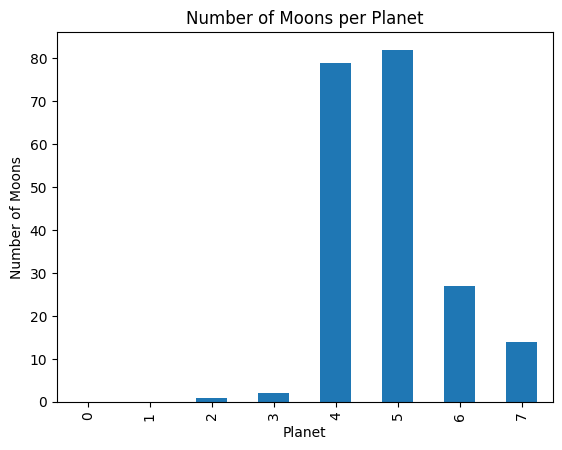

In [108]:
#Data Visualisation

#bar chart
#show number of moons per planet
ab = df['Number of Moons'].plot(kind='bar', title='Number of Moons per Planet')
ab.set_xlabel('Planet')
ab.set_ylabel('Number of Moons')
plt.show()

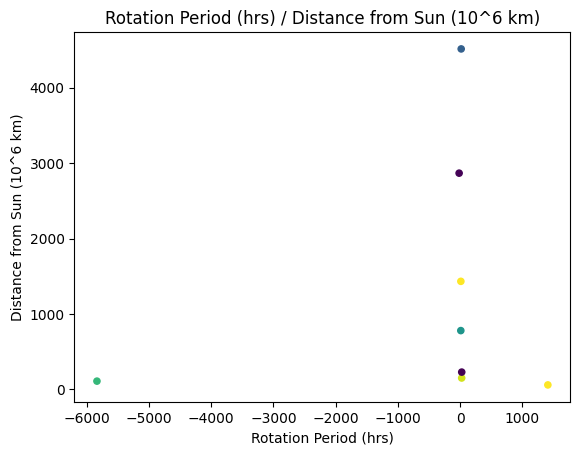

In [115]:
#scatter plot

#show rotation period as compared to distance from Sun
#add colors

N = 8
colors = np.random.rand(N)
df.plot(kind='scatter',x='Rotation Period (hrs)',y='Distance from Sun (10^6 km)',c=colors, title='Rotation Period (hrs) / Distance from Sun (10^6 km)')

plt.show()

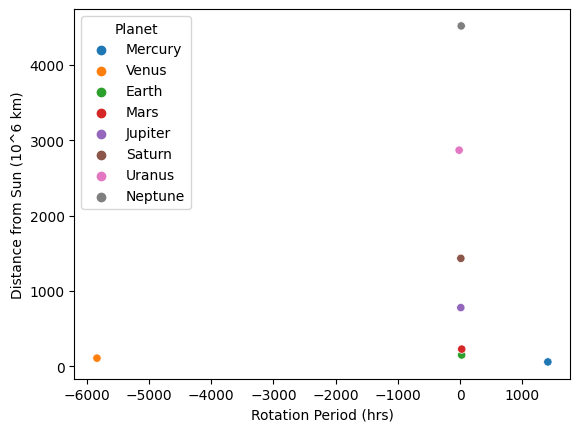

In [111]:
#same scatter plot as above, using Seaborn

sns.scatterplot(x='Rotation Period (hrs)',y='Distance from Sun (10^6 km)',hue='Planet',data=df)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

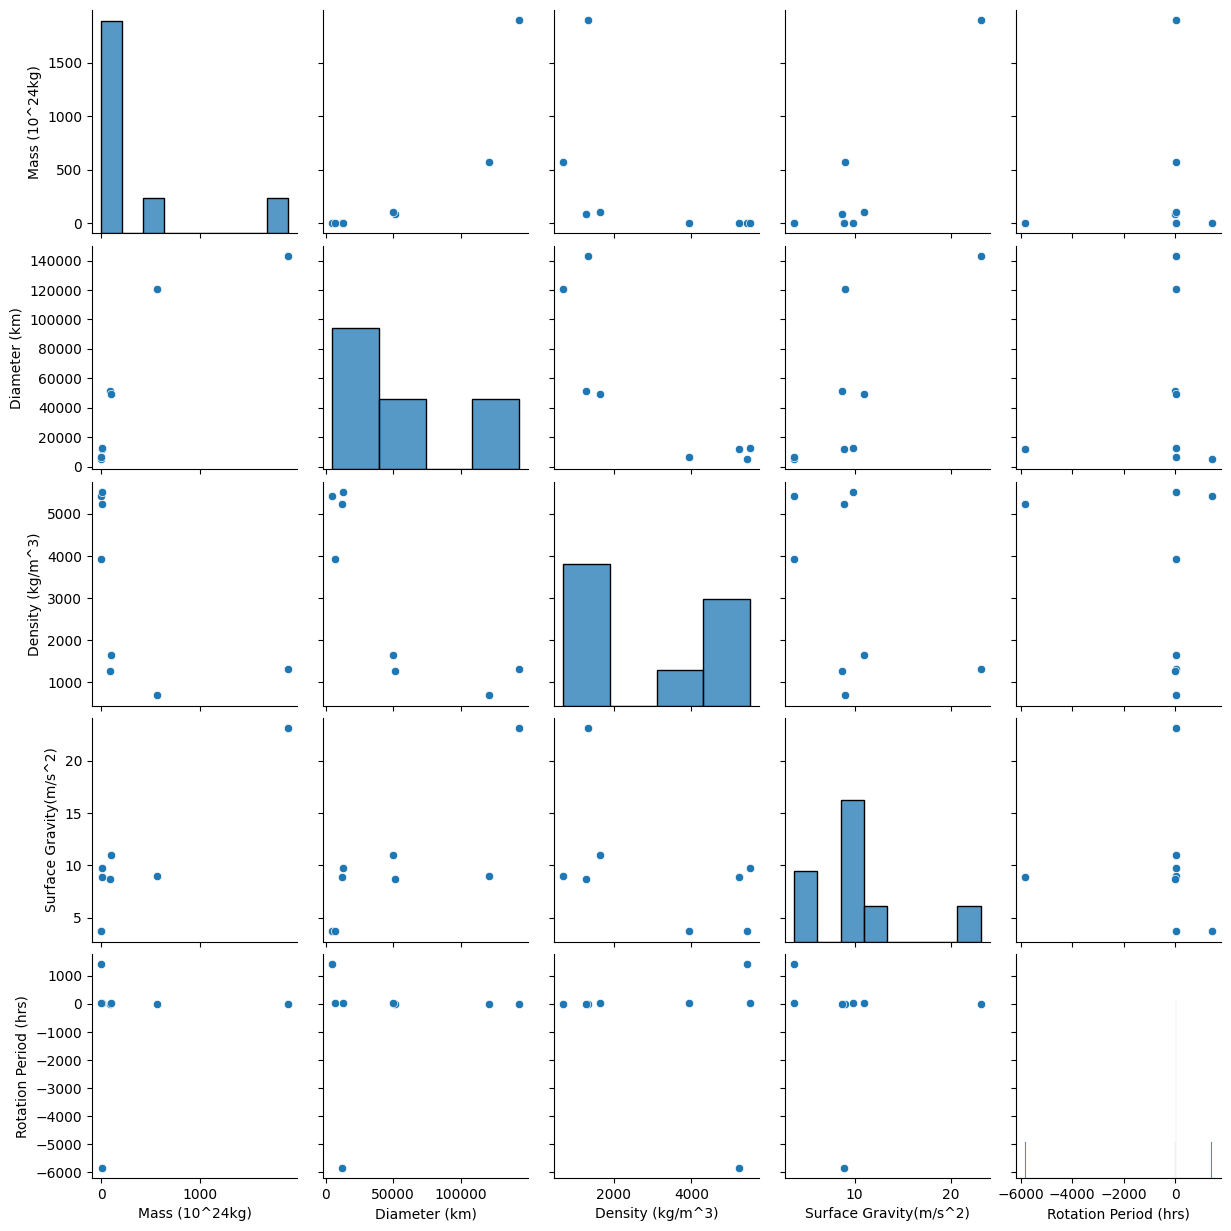

In [112]:
#Seaborn: compare 5 features against each other
sns.pairplot(df, vars=['Mass (10^24kg)','Diameter (km)','Density (kg/m^3)','Surface Gravity(m/s^2)', 'Rotation Period (hrs)'])
plt.show()

In [113]:
#Seaborn: show correlation between features, using corr()
df_cor = df[['Mass (10^24kg)','Diameter (km)','Density (kg/m^3)','Surface Gravity(m/s^2)', 'Rotation Period (hrs)']].dropna().corr()

<Axes: >

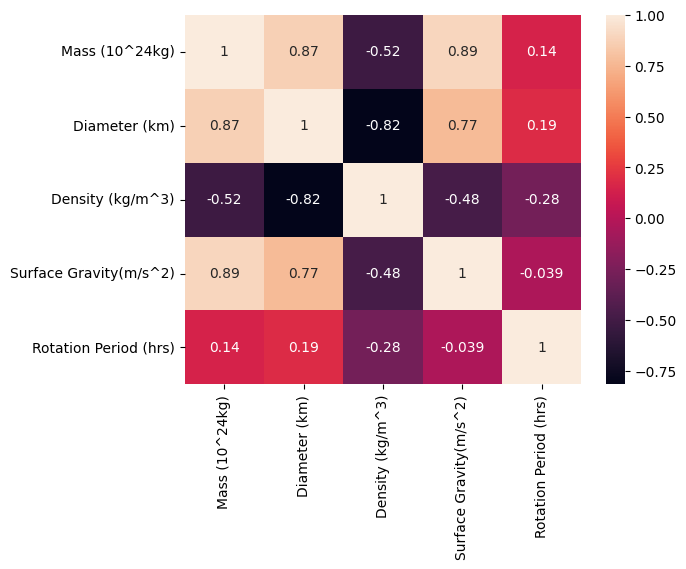

In [114]:
#Seaborn: show heatmaps to df_cor above, adding annotations
sns.heatmap(df_cor, annot=True)